### **Vivek Dadhich**

### **20MAI0077**

### Repository-link -> https://github.com/vivek20dadhich/CSE6037-Deep-Learning-and-its-Applications-Lab-Assignments

 **Task 2** -> Write a program to implement the new CNN model. The model should contains following
things : (Note : use any grayscale dataset with the 10 classes)

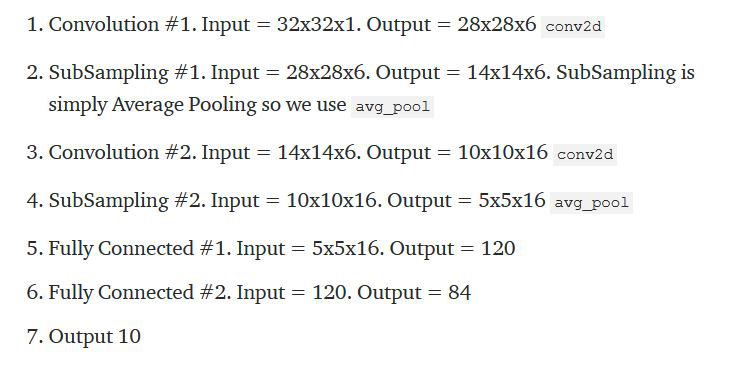
<br /><br />

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, AveragePooling2D


In [79]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [80]:
#Reshape the training and test set
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [81]:
#Normalization
x_train = tf.keras.utils.normalize(x_train, axis=1)  
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [82]:
import keras 
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [83]:
#Model Building

model = Sequential()
model.add(Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(AveragePooling2D())
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(AveragePooling2D())
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 6)         60        
_________________________________________________________________
average_pooling2d_4 (Average (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 16)        880       
_________________________________________________________________
average_pooling2d_5 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               51328     
Total params: 52,268
Trainable params: 52,268
Non-trainable params: 0
__________________________________________________

In [84]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [85]:
model.fit(x_train, y_train, 
          epochs=10, 
          validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 26s 14ms/step - loss: 5.0524 - accuracy: 0.1065 - val_loss: 4.8520 - val_accuracy: 0.0980
Epoch 2/10
1875/1875 [==============================] - 25s 14ms/step - loss: 4.8520 - accuracy: 0.0998 - val_loss: 4.8520 - val_accuracy: 0.0980
Epoch 3/10
1875/1875 [==============================] - 25s 14ms/step - loss: 4.8520 - accuracy: 0.0992 - val_loss: 4.8520 - val_accuracy: 0.0980
Epoch 4/10
1875/1875 [==============================] - 25s 14ms/step - loss: 4.8520 - accuracy: 0.0998 - val_loss: 4.8520 - val_accuracy: 0.0980
Epoch 5/10
1875/1875 [==============================] - 25s 14ms/step - loss: 4.8520 - accuracy: 0.1001 - val_loss: 4.8520 - val_accuracy: 0.0980
Epoch 6/10
1875/1875 [==============================] - 25s 14ms/step - loss: 4.8520 - accuracy: 0.0986 - val_loss: 4.8520 - val_accuracy: 0.0980
Epoch 7/10
1875/1875 [==============================] - 26s 14ms/step - loss: 4.8520 - accuracy: 0.1002 - val_loss: 4.8520 -

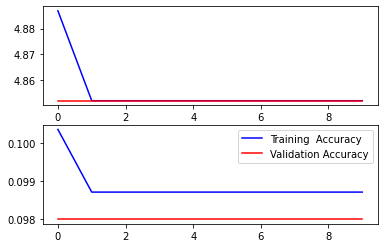

In [86]:
#After successful training, we will visualize its performance.

import matplotlib.pyplot as plt
#Plotting the training and validation loss

f,ax=plt.subplots(2,1) #Creates 2 subplots under 1 column

#Assigning the first subplot to graph training loss and validation loss
ax[0].plot(model.history.history['loss'],color='b',label='Training Loss')
ax[0].plot(model.history.history['val_loss'],color='r',label='Validation Loss')

#Plotting the training accuracy and validation accuracy
ax[1].plot(model.history.history['accuracy'],color='b',label='Training  Accuracy')
ax[1].plot(model.history.history['val_accuracy'],color='r',label='Validation Accuracy')

plt.legend()

In [95]:
predictions = model.predict(x_test)
print(np.argmax(predictions[0]))

0


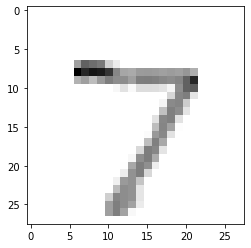

In [94]:
plt.imshow(tf.squeeze(x_test[0]),cmap=plt.cm.binary)
plt.show()